## Gomory–Hu tree

The __Gomory–Hu__ tree of an undirected graph $G$ with capacities on its edges is a weighted tree that represents the minimum $s$-$t$ cuts for all pairs of vertices $s$, $t$ in the graph $G$. See for example [Wikipedia](https://en.wikipedia.org/wiki/Gomory%E2%80%93Hu_tree) for more details.

##### Definition:

Let $G$ be an undirected graph with edge capacities $c_G(u, v)$, $uv \in E(G)$; let $\lambda_{st}$ be the capacity of minimal $s$-$t$ cut. 

A tree $T$ with $V(T) = V(G)$ is said to be a __Gomory-Hu__ tree of $G$ if for each $s, t \in V(G)$, $\lambda_{st} = \min_{uv \in P(s,t)}c_T(u,v)$, where $P(s,t)$ is a set of edges on the path between $s$ and $t$ in $T$.




Write a function `gomory_hu_tree(G)` which returns a Gomory-Hu tree of the graph G. Assume that G is connected.

#### Algorithm

Let `G` be the input graph and `T` the result (vertices of `T` are sets of vertices of `G`)

```
T = tree with single vertex V(G)
while there exists a vertex X of T with |X| >= 2:
    choose s and t from X
    calculate minimal s-t cut in G with partition sets A, B (s in A, t in B), cut edges E, and value c
    split vertex X to X1 = X ∩ A and X2 = X ∩ B and connect them with edge with weight (label) c
    for each neighbor Y of X in T:
        if Y ⊂ A: add edge (X1, Y) to T, else: add edge (X2, Y) to T
    modify G as follows:
     1. remove all (cut) edges E between A and B
     2. add new vertex and connect it to the endpoints of cut edges E in A and B
        (pay attention that you sum capacities if you "merge" two or more edges into one)       
```

#### Notes and examples

In [2]:
G = Graph([(0, 1, 1), (0, 2, 7), (1, 2, 1), (1, 3, 3), (1, 4, 2), (2, 4, 4), (3, 4, 1), (3, 5, 6), (4, 5, 2)])

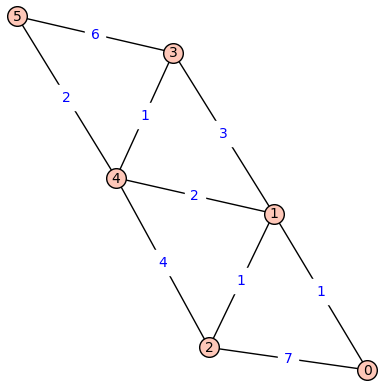

In [3]:
G.plot(edge_labels=True)

To calculate minimal edge cut, we can use Ford-Fulkerson algorithm. We will use built-in `edge_cut` function. 
Example for the graph above for $s$ = 0 and $t$ = 5:

In [4]:
G.edge_cut(0, 5, use_edge_labels=True)

6

To get more data (edges of the cut and the two sets separating 0 and 5) use:

In [5]:
G.edge_cut(0, 5, vertices=True, use_edge_labels=True)

[6, [(0, 1, 1), (1, 2, 1), (2, 4, 4)], [[0, 2], [1, 3, 4, 5]]]

In [6]:
def gomory_hu_tree(G):
    pass

In [7]:
GT = gomory_hu_tree(G)

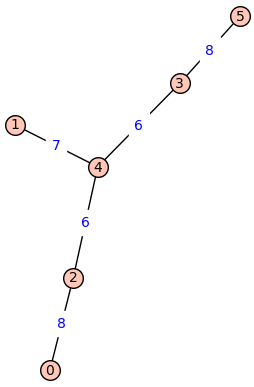

In [8]:
GT.plot(edge_labels=True)

In [22]:
def min_cut_from_tree(T, s, t):
    P = T.shortest_path(s, t)
    return min([T.edge_label(P[i], P[i + 1]) for i in range(len(P) - 1)])

In [28]:
[(u, v, min_cut_from_tree(GT, u, v), G.edge_cut(u, v, use_edge_labels=True)) for v in G.vertices() for u in G.vertices() if u < v]

[(0, 1, 6, 6),
 (0, 2, 8, 8),
 (1, 2, 6, 6),
 (0, 3, 6, 6),
 (1, 3, 6, 6),
 (2, 3, 6, 6),
 (0, 4, 6, 6),
 (1, 4, 7, 7),
 (2, 4, 6, 6),
 (3, 4, 6, 6),
 (0, 5, 6, 6),
 (1, 5, 6, 6),
 (2, 5, 6, 6),
 (3, 5, 8, 8),
 (4, 5, 6, 6)]

### More tests

In [9]:
def add_random_weights(G, minw, maxw):
    for u, v in G.edges(labels=False):
        G.add_edge(u, v, randint(minw, maxw))
    return G

In [29]:
C = add_random_weights(graphs.CycleGraph(10), 1, 10)

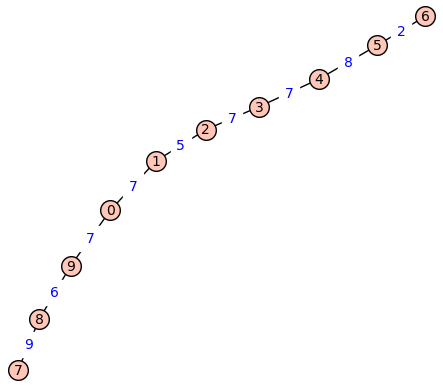

In [30]:
CT = gomory_hu_tree(C)
CT.plot(edge_labels=True)

In [31]:
[(u, v, min_cut_from_tree(CT, u, v), C.edge_cut(u, v, use_edge_labels=True)) for v in C.vertices() for u in C.vertices() if u < v]

[(0, 1, 7, 7),
 (0, 2, 5, 5),
 (1, 2, 5, 5),
 (0, 3, 5, 5),
 (1, 3, 5, 5),
 (2, 3, 7, 7),
 (0, 4, 5, 5),
 (1, 4, 5, 5),
 (2, 4, 7, 7),
 (3, 4, 7, 7),
 (0, 5, 5, 5),
 (1, 5, 5, 5),
 (2, 5, 7, 7),
 (3, 5, 7, 7),
 (4, 5, 8, 8),
 (0, 6, 2, 2),
 (1, 6, 2, 2),
 (2, 6, 2, 2),
 (3, 6, 2, 2),
 (4, 6, 2, 2),
 (5, 6, 2, 2),
 (0, 7, 6, 6),
 (1, 7, 6, 6),
 (2, 7, 5, 5),
 (3, 7, 5, 5),
 (4, 7, 5, 5),
 (5, 7, 5, 5),
 (6, 7, 2, 2),
 (0, 8, 6, 6),
 (1, 8, 6, 6),
 (2, 8, 5, 5),
 (3, 8, 5, 5),
 (4, 8, 5, 5),
 (5, 8, 5, 5),
 (6, 8, 2, 2),
 (7, 8, 9, 9),
 (0, 9, 7, 7),
 (1, 9, 7, 7),
 (2, 9, 5, 5),
 (3, 9, 5, 5),
 (4, 9, 5, 5),
 (5, 9, 5, 5),
 (6, 9, 2, 2),
 (7, 9, 6, 6),
 (8, 9, 6, 6)]

In [32]:
R = add_random_weights(graphs.RandomGNP(10, 0.5), 1, 10)

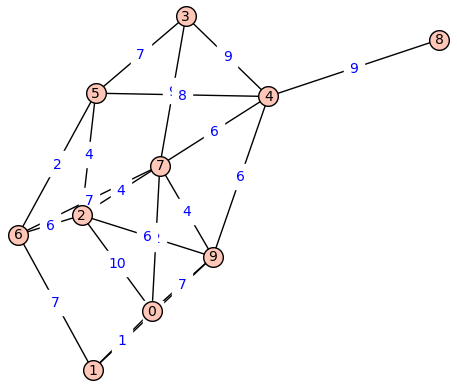

In [34]:
R.plot(edge_labels=True)

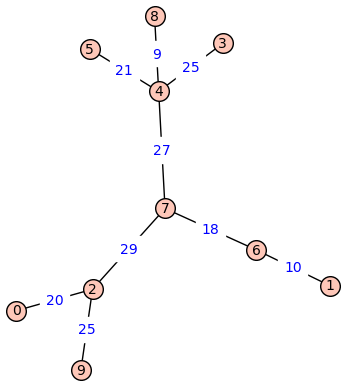

In [35]:
RT = gomory_hu_tree(R)
RT.plot(edge_labels=True)

In [36]:
[(u, v, min_cut_from_tree(RT, u, v), R.edge_cut(u, v, use_edge_labels=True)) for v in R.vertices() for u in R.vertices() if u < v]

[(0, 1, 10, 10),
 (0, 2, 20, 20),
 (1, 2, 10, 10),
 (0, 3, 20, 20),
 (1, 3, 10, 10),
 (2, 3, 25, 25),
 (0, 4, 20, 20),
 (1, 4, 10, 10),
 (2, 4, 27, 27),
 (3, 4, 25, 25),
 (0, 5, 20, 20),
 (1, 5, 10, 10),
 (2, 5, 21, 21),
 (3, 5, 21, 21),
 (4, 5, 21, 21),
 (0, 6, 18, 18),
 (1, 6, 10, 10),
 (2, 6, 18, 18),
 (3, 6, 18, 18),
 (4, 6, 18, 18),
 (5, 6, 18, 18),
 (0, 7, 20, 20),
 (1, 7, 10, 10),
 (2, 7, 29, 29),
 (3, 7, 25, 25),
 (4, 7, 27, 27),
 (5, 7, 21, 21),
 (6, 7, 18, 18),
 (0, 8, 9, 9),
 (1, 8, 9, 9),
 (2, 8, 9, 9),
 (3, 8, 9, 9),
 (4, 8, 9, 9),
 (5, 8, 9, 9),
 (6, 8, 9, 9),
 (7, 8, 9, 9),
 (0, 9, 20, 20),
 (1, 9, 10, 10),
 (2, 9, 25, 25),
 (3, 9, 25, 25),
 (4, 9, 25, 25),
 (5, 9, 21, 21),
 (6, 9, 18, 18),
 (7, 9, 25, 25),
 (8, 9, 9, 9)]